In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np 
from sklearn.model_selection import (KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV)

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, accuracy_score, classification_report, f1_score, precision_recall_fscore_support)

train = pd.read_csv('alc-datathon-2021/covid_mental_health_train.csv')
test = pd.read_csv('alc-datathon-2021/covid_mental_health_test.csv')

train.shape
test.shape
train.isnull().sum()
test.isnull().sum()

id                          0
city                        0
gender                      0
age                         0
job                         0
health_worker_self          0
health_worker_family        0
family_status               0
income_group              379
current_physical            0
past_physical               0
current_mental              0
past_mental                 0
exercise                    0
healthy_diet                0
healthy_sleep               0
activity                    0
interaction_offline         0
interaction_online          0
preventive_behaviors        0
optimism                    0
deterioration_economy       0
deterioration_interact      0
frustration                 0
covid_anxiety               0
covid_sleepless             0
difficulty_living           0
difficulty_work             0
dtype: int64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8610 non-null   int64  
 1   city                    8610 non-null   int64  
 2   gender                  8610 non-null   int64  
 3   age                     8610 non-null   int64  
 4   job                     8610 non-null   int64  
 5   health_worker_self      8610 non-null   int64  
 6   health_worker_family    8610 non-null   int64  
 7   family_status           8610 non-null   int64  
 8   income_group            7282 non-null   float64
 9   current_physical        8610 non-null   int64  
 10  past_physical           8610 non-null   int64  
 11  current_mental          8610 non-null   int64  
 12  past_mental             8610 non-null   int64  
 13  exercise                8610 non-null   int64  
 14  healthy_diet            8610 non-null   

   gender  depression
1       2    0.195715
0       1    0.163605


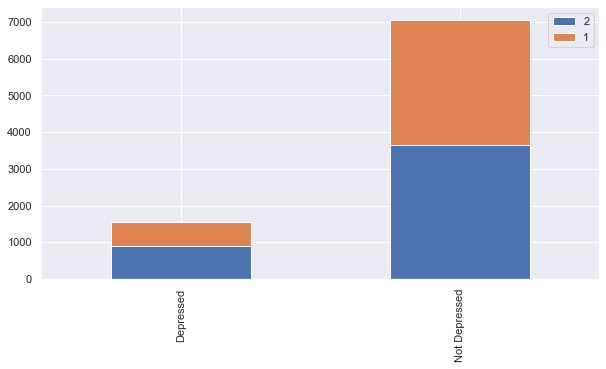

In [58]:
def bar_chart(feature):
    depressed = train[train['depression']==1][feature].value_counts()
    not_depressed = train[train['depression']==0][feature].value_counts()
    df = pd.DataFrame([depressed,not_depressed])
    df.index = ['Depressed','Not Depressed']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    print(train[[feature,'depression']].groupby([feature], as_index=False).mean().sort_values(by='depression', ascending=False))

bar_chart('gender')

   city  depression
4     5    0.194651
2     3    0.192007
5     6    0.185714
1     2    0.182584
3     4    0.180773
6     7    0.171355
0     1    0.164929


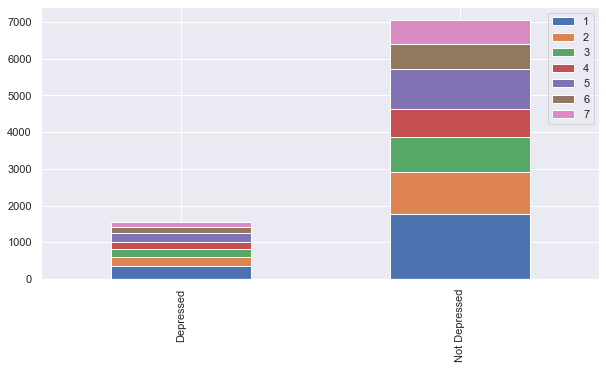

In [59]:
bar_chart('city')

   family_status  depression
0              1    0.237557
1              2    0.145455


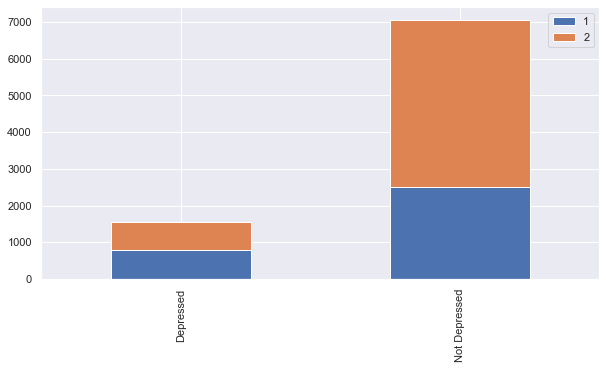

In [60]:
bar_chart('family_status')

   job  depression
2    3    0.243323
4    5    0.216912
0    1    0.184329
1    2    0.158537
3    4    0.152522


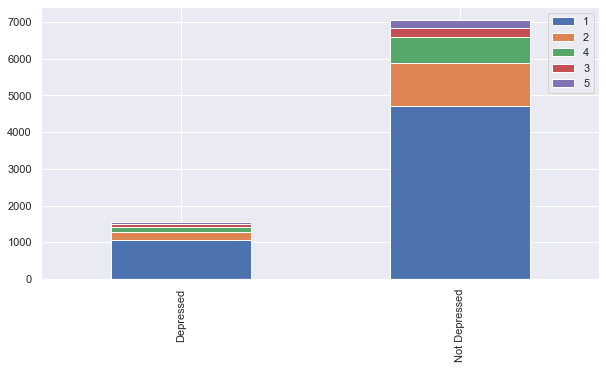

In [61]:
bar_chart('job')

   income_group  depression
0           1.0    0.287474
9          10.0    0.218097
8           9.0    0.197183
1           2.0    0.190508
2           3.0    0.171021
3           4.0    0.156670
6           7.0    0.140152
5           6.0    0.132170
4           5.0    0.131793
7           8.0    0.111888


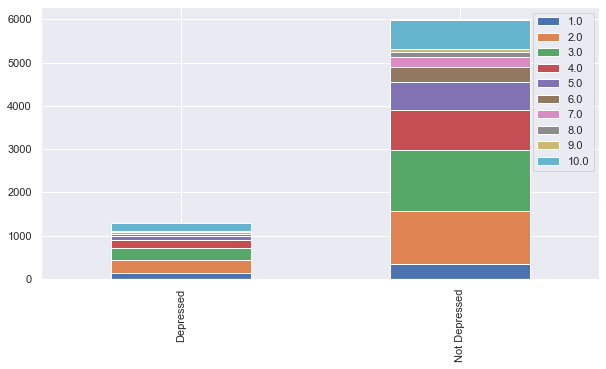

In [62]:
bar_chart('income_group')

   current_mental  depression
0               1    0.556911
1               2    0.157674


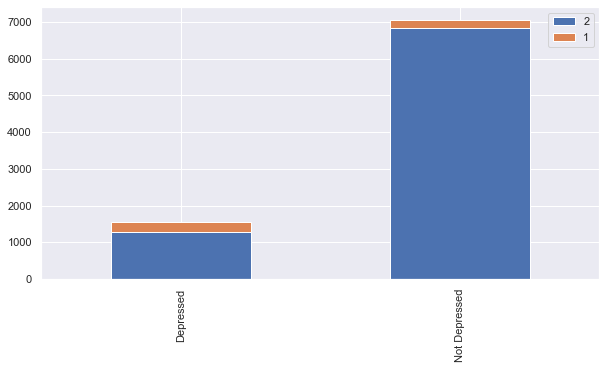

In [63]:
bar_chart('current_mental')

   past_mental  depression
0            1    0.383430
1            2    0.152668


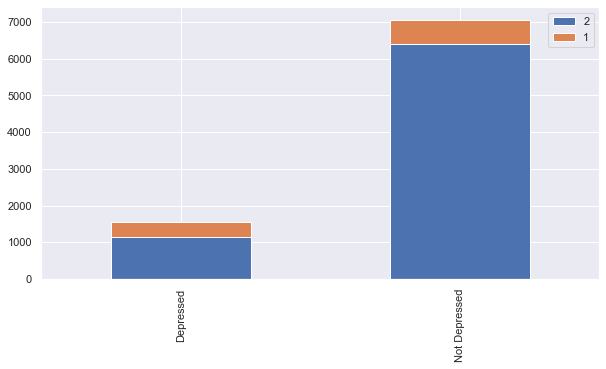

In [64]:
bar_chart('past_mental')

   current_physical  depression
0                 1    0.231383
1                 2    0.178164


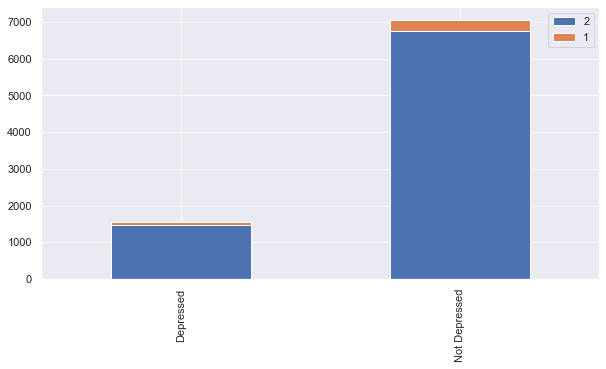

In [65]:
bar_chart('current_physical')

   past_physical  depression
0              1    0.224583
1              2    0.176833


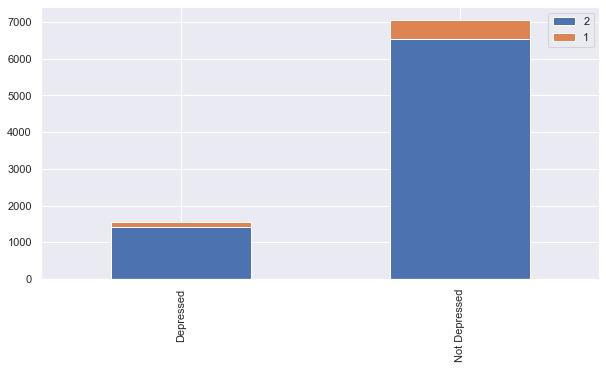

In [66]:
bar_chart('past_physical')

   frustration  depression
6            7    0.443515
5            6    0.327391
4            5    0.227220
3            4    0.193820
2            3    0.180085
1            2    0.097246
0            1    0.064163


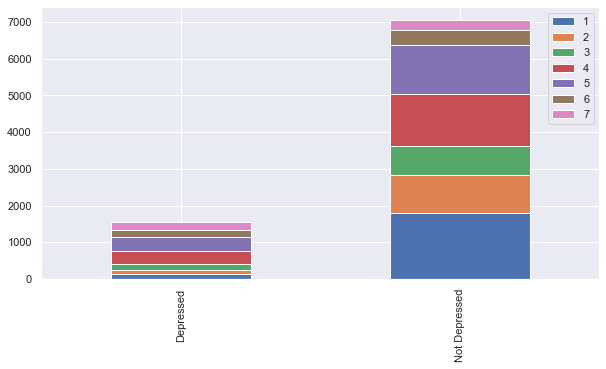

In [67]:
bar_chart('frustration')

   covid_anxiety  depression
6              7    0.367713
5              6    0.264271
3              4    0.180278
2              3    0.172452
4              5    0.157290
1              2    0.133333
0              1    0.093531


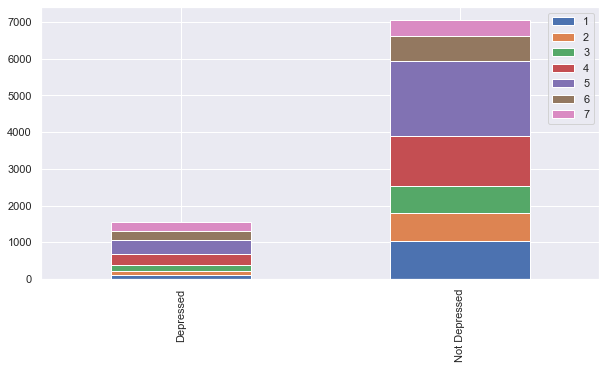

In [68]:
bar_chart('covid_anxiety')

   covid_sleepless  depression
6                7    0.324242
5                6    0.314721
4                5    0.287770
3                4    0.239252
2                3    0.212606
1                2    0.144050
0                1    0.099157


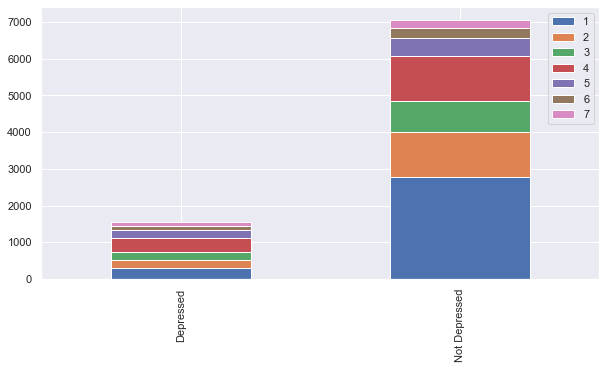

In [69]:
bar_chart('covid_sleepless')

   deterioration_economy  depression
6                      7    0.320378
5                      6    0.240102
2                      3    0.185535
4                      5    0.183212
3                      4    0.167587
1                      2    0.122754
0                      1    0.106028


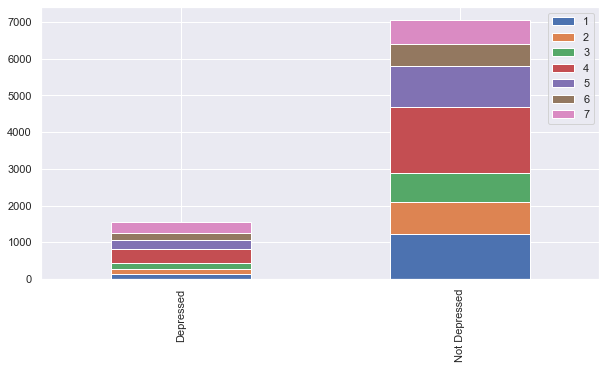

In [70]:
bar_chart('deterioration_economy')

   deterioration_interact  depression
6                       7    0.343195
4                       5    0.334936
3                       4    0.258239
5                       6    0.249267
2                       3    0.182464
1                       2    0.139230
0                       1    0.100855


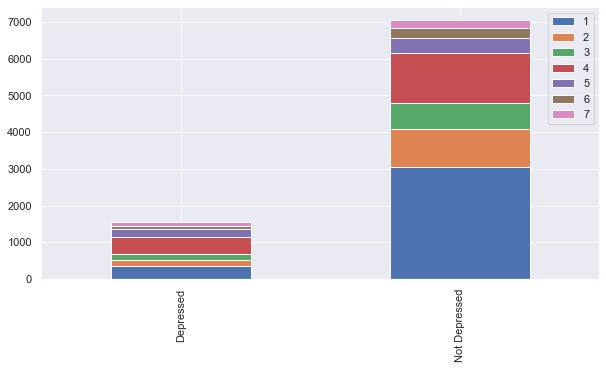

In [71]:
bar_chart('deterioration_interact')

   difficulty_living  depression
6                  7    0.343220
5                  6    0.221669
3                  4    0.207302
2                  3    0.184318
4                  5    0.183107
1                  2    0.134791
0                  1    0.089079


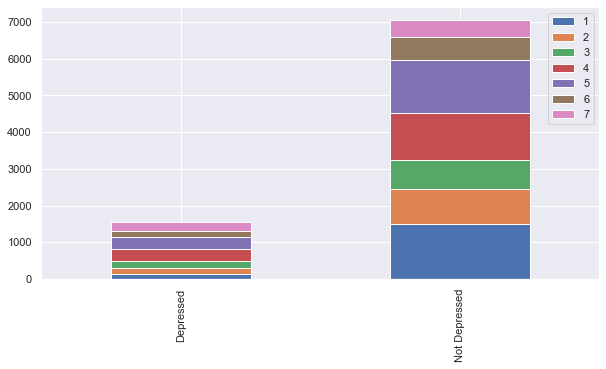

In [72]:
bar_chart('difficulty_living')

   difficulty_work  depression
6                7    0.279872
5                6    0.225118
2                3    0.203837
3                4    0.198556
4                5    0.177713
1                2    0.127418
0                1    0.089780


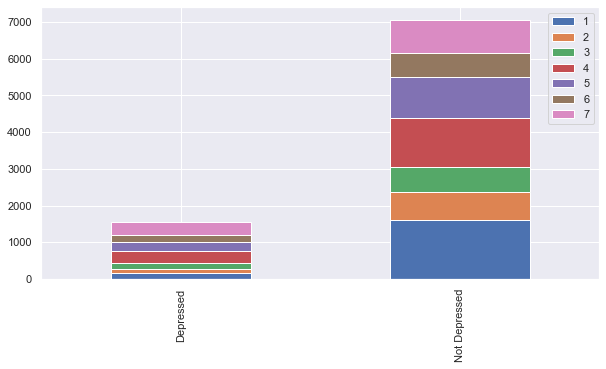

In [73]:
bar_chart('difficulty_work')

   optimism  depression
0         1    0.309028
1         2    0.273526
2         3    0.236019
6         7    0.153740
3         4    0.146901
4         5    0.136669
5         6    0.109902


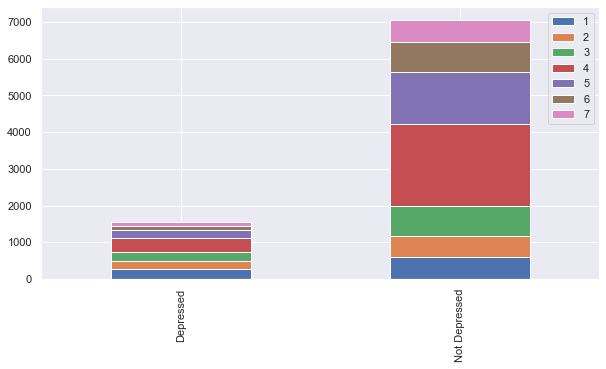

In [74]:
bar_chart('optimism')

   preventive_behaviors  depression
2                     3    0.246377
3                     4    0.241568
4                     5    0.198826
1                     2    0.183529
6                     7    0.169415
0                     1    0.162029
5                     6    0.135752


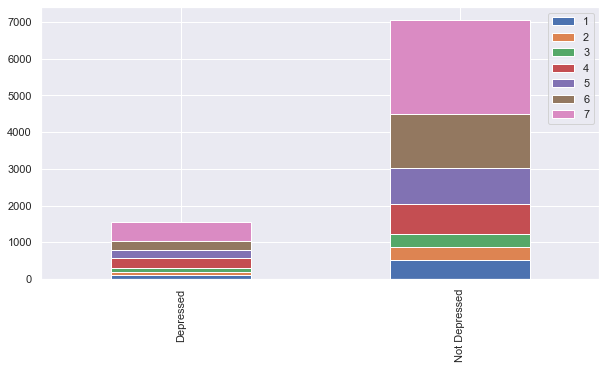

In [75]:
bar_chart('preventive_behaviors')

   difficulty_work  depression
6                7    0.279872
5                6    0.225118
2                3    0.203837
3                4    0.198556
4                5    0.177713
1                2    0.127418
0                1    0.089780


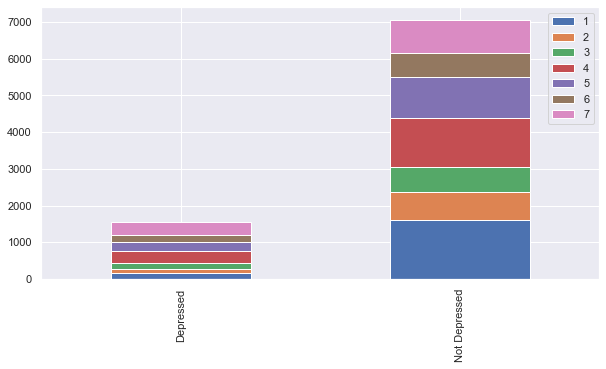

In [76]:
bar_chart('difficulty_work')

In [77]:
train[['current_physical','past_physical','depression']].groupby(['current_physical','past_physical'], as_index=False).mean().sort_values(by='depression', ascending=False)

,current_physical,past_physical,depression
0,1,1,0.265306
2,2,1,0.207343
1,1,2,0.194444
3,2,2,0.176425


   physical_cond  depression
3            3.0    0.265306
2            2.0    0.207343
1            1.0    0.194444
0            0.0    0.176425


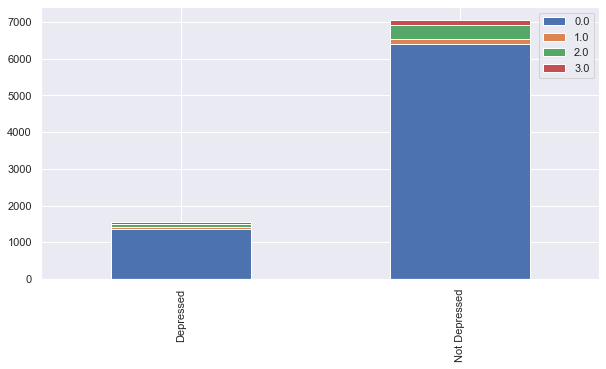

In [78]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset.loc[(dataset['current_physical']==2) & (dataset['past_physical']==2), 'physical_cond'] = 0
    dataset.loc[(dataset['current_physical']==1) & (dataset['past_physical']==2), 'physical_cond'] = 1
    dataset.loc[(dataset['current_physical']==2) & (dataset['past_physical']==1), 'physical_cond'] = 2
    dataset.loc[(dataset['current_physical']==1) & (dataset['past_physical']==1), 'physical_cond'] = 3


train = train.drop(['current_physical','past_physical'],axis=1)
test = test.drop(['current_physical','past_physical'],axis=1)

bar_chart('physical_cond')

   income_group  depression
0           1.0    0.287474
9          10.0    0.218097
8           9.0    0.197183
1           2.0    0.190508
2           3.0    0.180943
3           4.0    0.156670
6           7.0    0.140152
5           6.0    0.132170
4           5.0    0.131793
7           8.0    0.111888


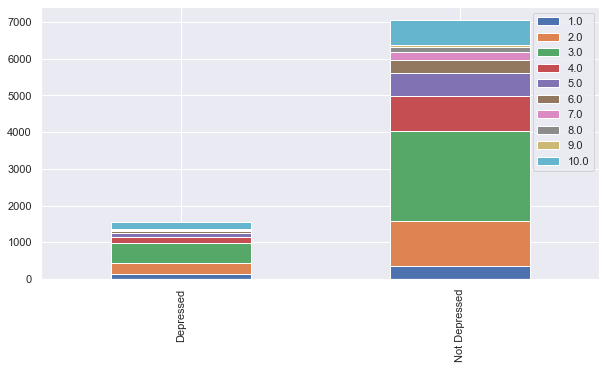

In [79]:
median = train["income_group"].median()
train["income_group"].fillna(median,inplace = True)
test["income_group"].fillna(median,inplace = True)
bar_chart('income_group')

   interaction  depression
0          1.0    0.215923
3          4.0    0.208721
2          3.0    0.204330
1          2.0    0.199102
4          5.0    0.183544
5          6.0    0.145833
6          7.0    0.126592


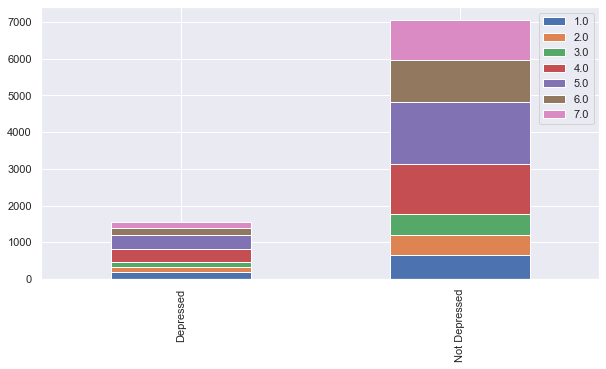

In [80]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset.loc[(dataset['interaction_offline'] >= dataset['interaction_online']), 'interaction'] = dataset['interaction_offline']
    dataset.loc[(dataset['interaction_offline'] < dataset['interaction_online']) , 'interaction'] = dataset['interaction_online']

bar_chart('interaction')

   deterioration_interact  depression
6                       7    0.343195
4                       5    0.334936
3                       4    0.258239
5                       6    0.249267
2                       3    0.182464
1                       2    0.139230
0                       1    0.100855


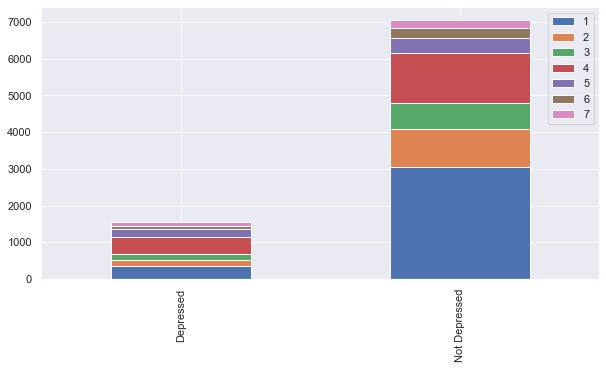

In [81]:
bar_chart('deterioration_interact')

In [82]:
train[['current_mental','past_mental','depression']].groupby(['current_mental','past_mental'], as_index=False).mean().sort_values(by='depression', ascending=False)


,current_mental,past_mental,depression
0,1,1,0.559322
1,1,2,0.550725
2,2,1,0.292398
3,2,2,0.145278


   mental_cond  depression
0          1.0    0.559322
1          2.0    0.550725
2          3.0    0.157674


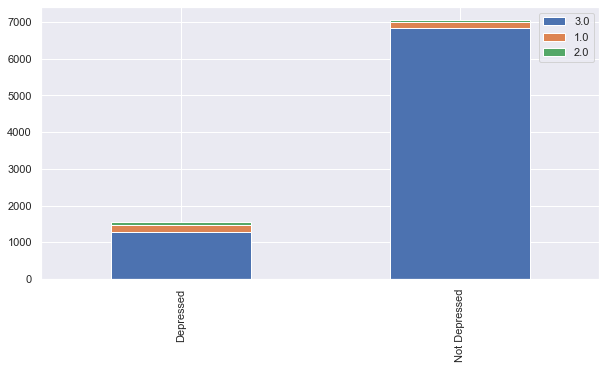

In [83]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset.loc[(dataset['current_mental']==1) & (dataset['past_mental']==1), 'mental_cond'] = 1
    dataset.loc[(dataset['current_mental']==1) & (dataset['past_mental']==2), 'mental_cond'] = 2
    dataset.loc[(dataset['current_mental']==2) , 'mental_cond'] = 3

bar_chart('mental_cond')

In [84]:
y = train['depression']

features = ['interaction','family_status','income_group', 'activity', 'current_mental','past_mental','optimism','deterioration_interact','preventive_behaviors', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living']
X = (train[features])
X_test = (test[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
y_predict = model.predict_proba(X_test)[:,1]
print(y_predict)
#output = pd.DataFrame({'id': test['id'], 'depression': y_predict})
#print(output)
#output.to_csv('3_RUET_Trinity_RandomForest_13th.csv', index=False)

rf_roc_auc = roc_auc_score(y_test, y_predict)
print(rf_roc_auc)

[0.14754793 0.08050697 0.1697862  ... 0.20512184 0.15273951 0.20017914]
0.8110391252925453


   healthy_sleep  depression
0              1    0.291108
1              2    0.239011
3              4    0.219479
2              3    0.204218
4              5    0.168839
5              6    0.122344
6              7    0.110883


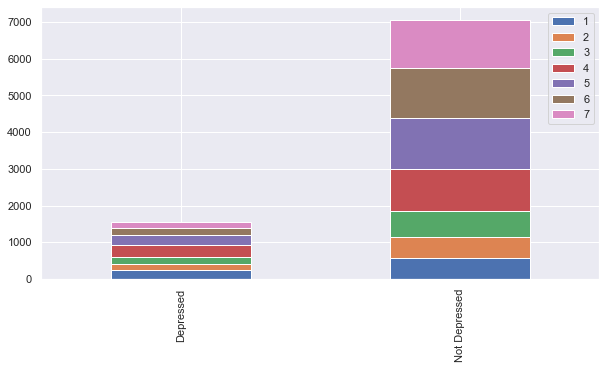

In [85]:
bar_chart('healthy_sleep')

   covid_sleepless  depression
6                7    0.324242
5                6    0.314721
4                5    0.287770
3                4    0.239252
2                3    0.212606
1                2    0.144050
0                1    0.099157


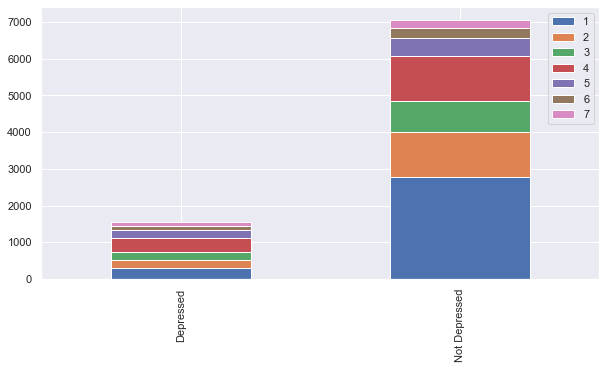

In [86]:
bar_chart('covid_sleepless')

   activity  depression
0         1    0.265188
2         3    0.215033
1         2    0.195178
3         4    0.179814
4         5    0.157570
6         7    0.132812
5         6    0.120000


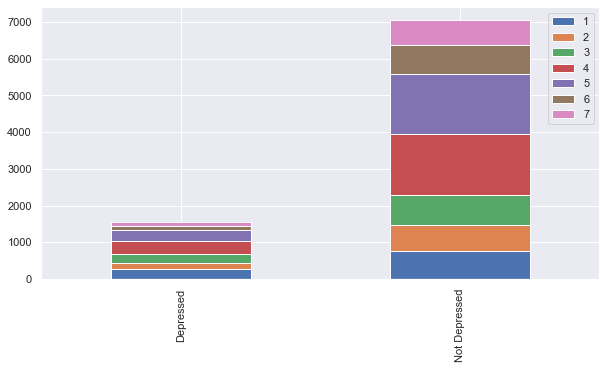

In [87]:
bar_chart('activity')

   exercise  depression
0         1    0.233393
2         3    0.212817
1         2    0.198490
3         4    0.187635
4         5    0.170361
6         7    0.154180
5         6    0.123118


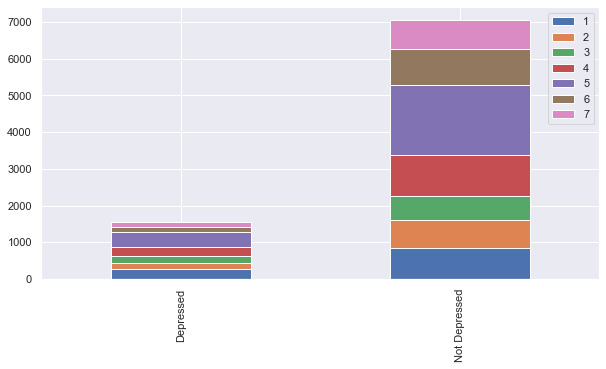

In [88]:
bar_chart('exercise')

In [55]:
y = train['depression']

features = ['interaction','family_status','income_group', 'activity', 'current_mental','past_mental','optimism','deterioration_interact','preventive_behaviors', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living']
X = (train[features])
X_test = (test[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
y_predict = model.predict_proba(X_test)[:,1]
print(y_predict)
#output = pd.DataFrame({'id': test['id'], 'depression': y_predict})
#print(output)
#output.to_csv('3_RUET_Trinity_RandomForest_13th.csv', index=False)

rf_roc_auc = roc_auc_score(y_test, y_predict)
print(rf_roc_auc)

[0.1077026  0.04762387 0.20286338 ... 0.17113088 0.11262136 0.07859192]
0.7951237520537987
